# Connect to GDrive and set working directory
## !! Skip if you run in local !!
1. Add a shortcut for working directory('IDPCode') to your drive as depicted below:
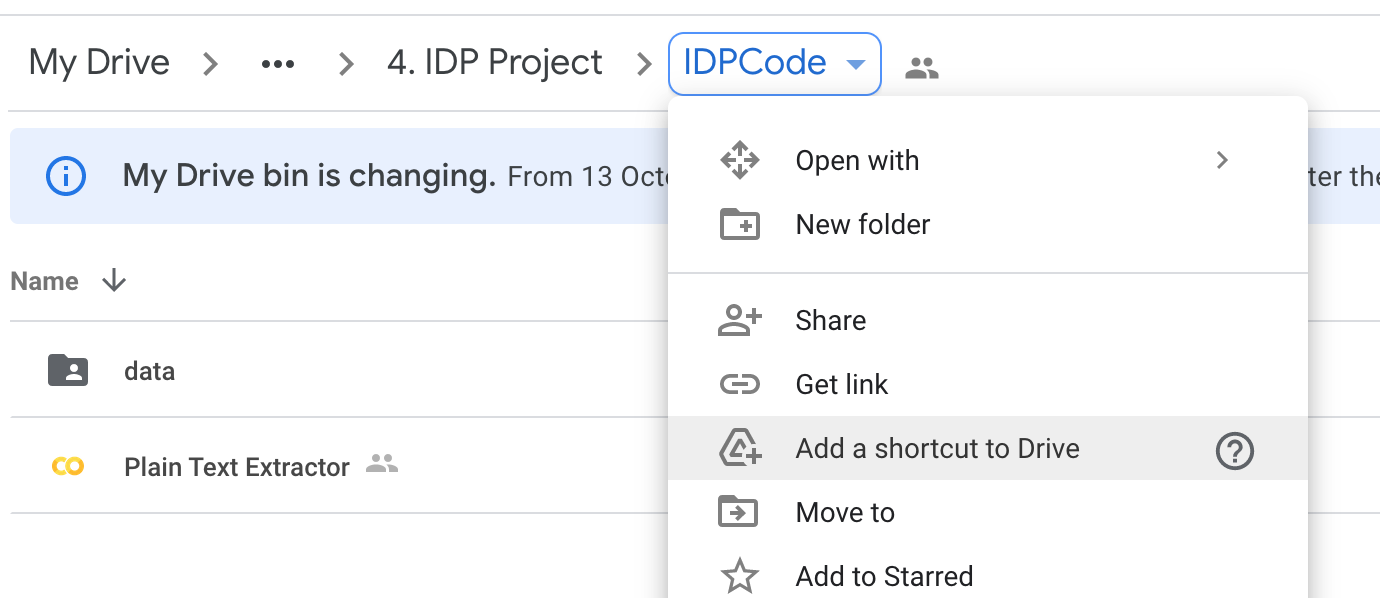
2. Run the command below to connect the GDrive:


In [1]:
# https://github.com/njanakiev/folderstats
# https://janakiev.com/blog/python-filesystem-analysis/
# https://networkx.org/documentation/stable/
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/IDPCode/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1d2RlPHkcJvE2Q0NDVZjeNW8VcVz3h_WL/IDPCode


In [2]:
!pip install folderstats
!pip install networkx
!pip install pydot
!pip install xlrd
!pip install ipython-autotime

# Start from here if you run in local !!

**Note: To use graphviz_layout from networkx package, 'graphviz' should be installed on the machine. You can install it via brew on OSX:**
```shell
brew install graph
```
**Check other install options in https://www.graphviz.org/download/ for other operating systems.**

In [8]:
import folderstats
import pandas as pd
import matplotlib.pyplot as plt

# https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# show execution time of cells
%load_ext autotime

# CHANGE PATH FOR THE DATASET FOLDER
DATA_DIRECTORY='data'

df = folderstats.folderstats(DATA_DIRECTORY, ignore_hidden=True)
df.head()

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
0,2,data/165_TAR.pdf,165_TAR,pdf,410795,2019-06-28 16:01:26,2019-06-28 16:01:26,2020-10-11 22:17:53,False,NaN,0,1,501
1,3,data/984_TAR.pdf,984_TAR,pdf,256633,2019-06-28 16:36:04,2019-06-28 16:36:04,2020-10-11 22:17:53,False,NaN,0,1,501
2,4,data/175_TAR.pdf,175_TAR,pdf,246525,2019-06-28 16:01:58,2019-06-28 16:01:58,2020-10-11 22:17:53,False,NaN,0,1,501
3,5,data/994_TAR.pdf,994_TAR,pdf,399383,2019-06-28 16:36:36,2019-06-28 16:36:36,2020-10-11 22:17:53,False,NaN,0,1,501
4,6,data/730_TAR.pdf,730_TAR,pdf,289754,2019-06-28 16:24:54,2019-06-28 16:24:54,2020-10-11 22:17:53,False,NaN,0,1,501


time: 596 ms


# File Type Distribution

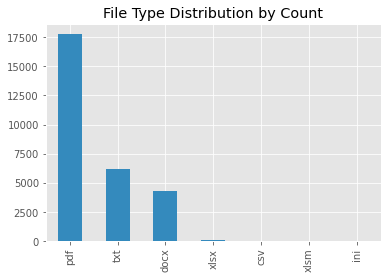

time: 208 ms


In [4]:
with plt.style.context('ggplot'):
    df['extension'].value_counts().plot(
        kind='bar', color='C1', title='File Type Distribution by Count');

PDF file count in depth #1: 15751
PDF file count in depth #2: 1597
PDF file count in depth #3: 422


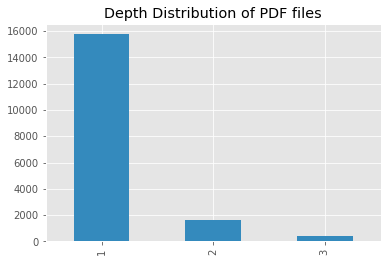

time: 221 ms


In [5]:
df_files = df[df['folder']==False]
df_pdf_files = df_files[df_files['extension']=='pdf']

with plt.style.context('ggplot'):
    df_pdf_files['depth'].value_counts().plot(
        kind='bar', color='C1', title='Depth Distribution of PDF files')

df_pdf_files_in_depth_1 = df_pdf_files[df_pdf_files['depth']==1]
df_pdf_files_in_depth_2 = df_pdf_files[df_pdf_files['depth']==2]
df_pdf_files_in_depth_3 = df_pdf_files[df_pdf_files['depth']==3]
print("PDF file count in depth #1: {}".format(df_pdf_files_in_depth_1.count()['size']))
print("PDF file count in depth #2: {}".format(df_pdf_files_in_depth_2.count()['size']))
print("PDF file count in depth #3: {}".format(df_pdf_files_in_depth_3.count()['size']))

In [6]:
df_folders = df[df['folder']] #list directories
#df_folders[df['parent'] == 1] #list directories in depth one
unrelated_folders = df_folders[df['parent'] != 1]
unrelated_folders['path']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


1192           data/2_JAE/txt_files/Python
1786         data/2_JAE/txt_files/WPS_Word
2379           data/2_JAE/txt_files/UIPath
2380                  data/2_JAE/txt_files
2690                      data/23_JIS/PDFs
4818     data/1_TAR/txt files/Word_WPS (1)
5946       data/1_TAR/txt files/UIPath (1)
6630           data/1_TAR/txt files/Python
6631                  data/1_TAR/txt files
7766                    data/1_TAR/uncrack
9181         data/3_JAR/txt_files/WPS_Word
9781           data/3_JAR/txt_files/UIPath
10384      data/3_JAR/txt_files/Python (1)
10385                 data/3_JAR/txt_files
11076      data/4_AOS/txt_files/Python (1)
11744      data/4_AOS/txt_files/UIPath (1)
12428        data/4_AOS/txt_files/WPS_Word
12429                 data/4_AOS/txt_files
13210      data/5_CAR/txt_files/Python (1)
13978      data/5_CAR/txt_files/UIPath (1)
14740        data/5_CAR/txt_files/WPS_Word
14741                 data/5_CAR/txt_files
16861        data/6_RAS/txt_files/WPS_Word
16863      

time: 12.1 ms


In [7]:
df_pdf_files_in_depth_1['path']
for i in df_pdf_files_in_depth_1['path']:
  print(i)
  break


data/2_JAE/30_JAE.pdf
time: 3.53 ms


Name: 
Type: Graph
Number of nodes: 28414
Number of edges: 28413
Average degree:   1.9999


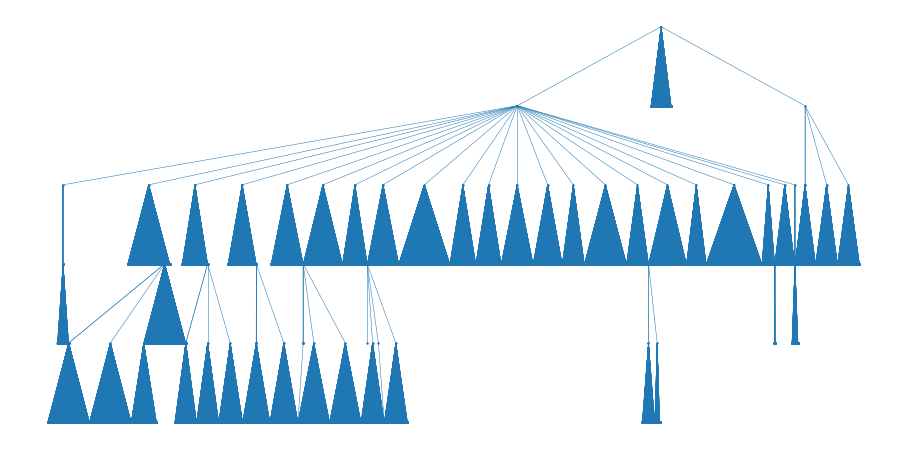

time: 11min 29s


In [8]:
import networkx as nx

# Sort the index
df_sorted = df.sort_values(by='id')

G = nx.Graph()
for i, row in df_sorted.iterrows():
    if row.parent:
        G.add_edge(row.id, row.parent)
    
# Print some additional information
print(nx.info(G))

from networkx.drawing.nx_pydot import graphviz_layout

pos_dot = graphviz_layout(G, prog='dot')

fig = plt.figure(figsize=(16, 8))
nodes = nx.draw_networkx_nodes(G, pos_dot, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_dot, edge_color='C0', width=0.5)
plt.axis('off');

# Examine all dataset extracted via Tika

In [3]:
# dt = Dataset Tika
dt = pd.read_pickle('All_Papers_In_Plain_Text_TIKA.pkl')

time: 6.13 s


In [6]:
# Utility functions
def remove_dollar_sign(text):
  '''
  While drawing title count distribution, mathplotlib throws an error.
  Because some titles have dollar sign('$'). This method is used to clear the sign.
  '''
  
  text = str(text).replace('$', '\$')
  return text
  

time: 417 µs


## 1. Show metadata column names

In [11]:
col_page = [col for col in dt if col.startswith('page') and not col.endswith('_wc')]
col_page_count = [col for col in dt if col.startswith('page') and col.endswith('_wc')]
col_file_path = 'file_path'
col_total_page_count = 'total_page_count'

col_not_metadata = col_page + col_page_count + [col_file_path] + [col_total_page_count]

col_metadata = [col for col in dt if col not in col_not_metadata]
col_metadata

['Unnamed: 0',
 'Author',
 'Content-Type',
 'Creation-Date',
 'Keywords',
 'Last-Modified',
 'Last-Save-Date',
 'X-Parsed-By',
 'X-TIKA:content_handler',
 'X-TIKA:embedded_depth',
 'X-TIKA:parse_time_millis',
 'access_permission:assemble_document',
 'access_permission:can_modify',
 'access_permission:can_print',
 'access_permission:can_print_degraded',
 'access_permission:extract_content',
 'access_permission:extract_for_accessibility',
 'access_permission:fill_in_form',
 'access_permission:modify_annotations',
 'cp:subject',
 'created',
 'creator',
 'date',
 'dc:creator',
 'dc:description',
 'dc:format',
 'dc:subject',
 'dc:title',
 'dcterms:created',
 'dcterms:modified',
 'description',
 'meta:author',
 'meta:creation-date',
 'meta:keyword',
 'meta:save-date',
 'modified',
 'pdf:PDFVersion',
 'pdf:charsPerPage',
 'pdf:docinfo:created',
 'pdf:docinfo:creator',
 'pdf:docinfo:creator_tool',
 'pdf:docinfo:keywords',
 'pdf:docinfo:modified',
 'pdf:docinfo:producer',
 'pdf:docinfo:subject'

time: 18.8 ms


## 2. Check page count distribution

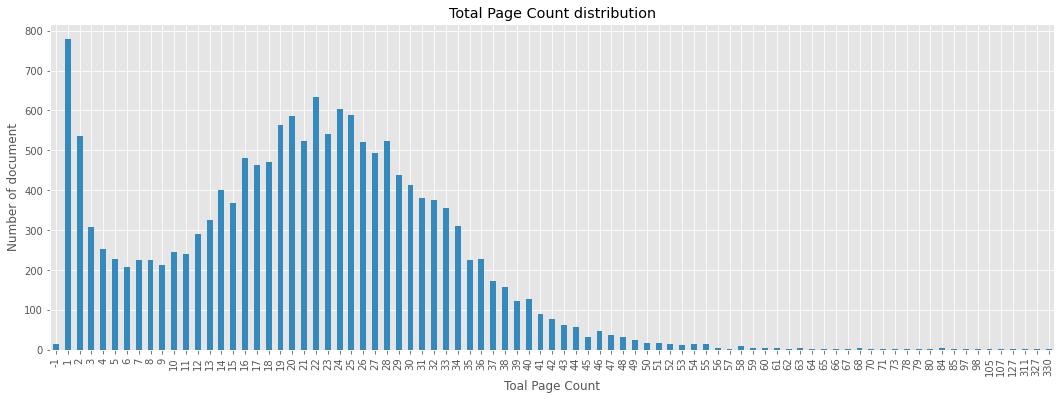

time: 1.61 s


In [17]:
with plt.style.context('ggplot'):
    ax = dt['total_page_count'].value_counts().sort_index().plot(
        kind='bar', color='C1', title='Total Page Count distribution', figsize=(18, 6))
    ax.set_xlabel("Toal Page Count")
    ax.set_ylabel("Number of document")

In [21]:
dt[dt['total_page_count']==1]['file_path'].head(1)

106    /Users/farukcankaya/Google Drive/AllPapers/8_AH/683_AH.pdf
Name: file_path, dtype: object

time: 32.2 ms


## 3. Check title distribution in metadata

In [22]:
dt['title'] = dt['title'].apply(remove_dollar_sign)
title_counts = dt['title'].value_counts()
title_counts_per_uniq_title = title_counts.tolist()
title_counts = title_counts[title_counts > 4]

time: 181 ms


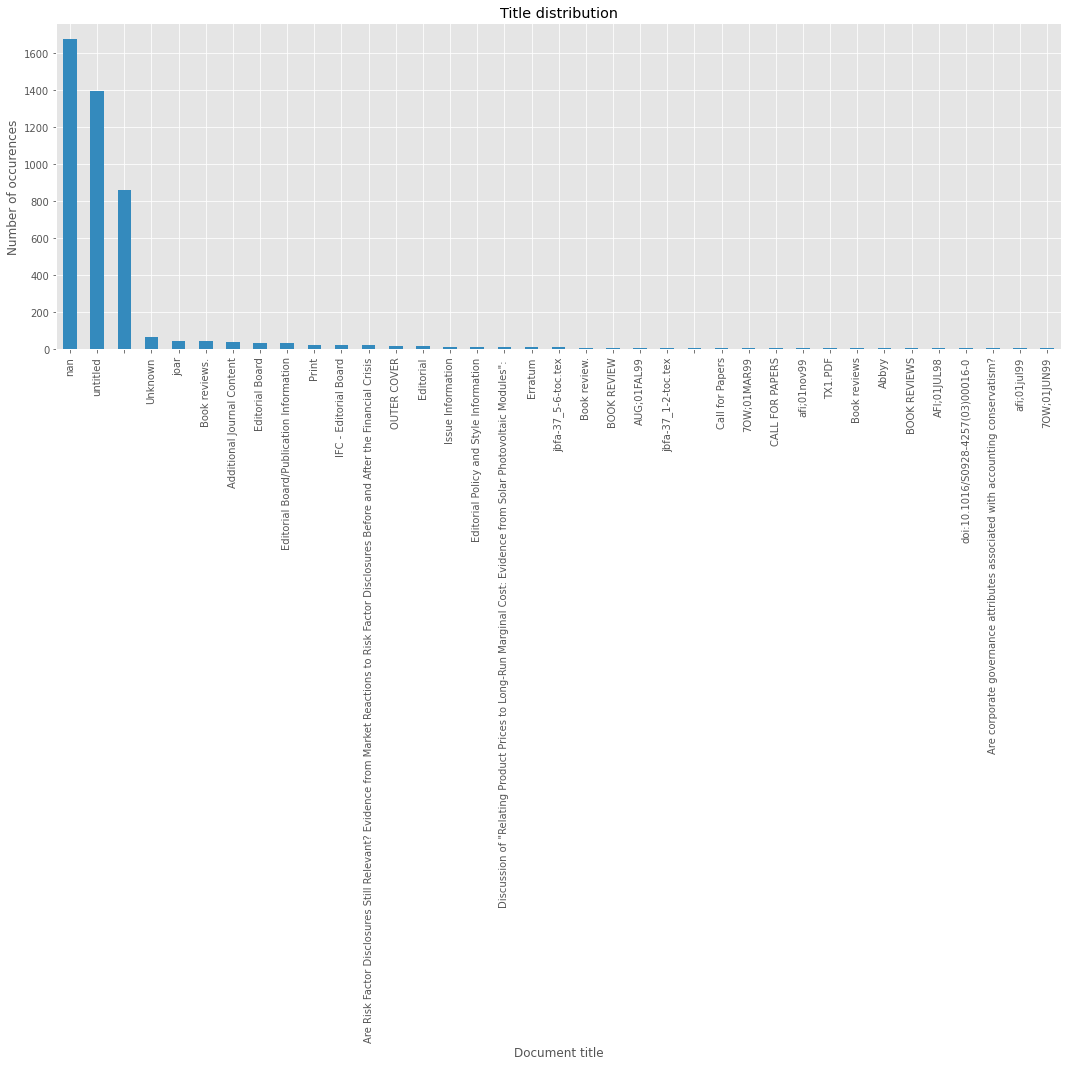

time: 952 ms


In [23]:
with plt.style.context('ggplot'):
    ax = title_counts.plot(
        kind='bar', color='C1', title='Title distribution', figsize=(18, 6))
    ax.set_xlabel("Document title")
    ax.set_ylabel("Number of occurences")

In [24]:
print("Total PDF count: {}".format(dt.count()['file_path']))
print("# of PDF that has title in metadata: {}".format(dt['title'].count()))

Total PDF count: 15751
# of PDF that has title in metadata: 15751
time: 10.8 s


## 4. Distribution of Word count per document

In [33]:
dt3c = pd.read_excel('All_Papers_In_Plain_Text_TIKA_full_pre_processed.xlsx')

time: 8.02 s


In [35]:
words_in_doc = [len(str(d).split(' ')) for d in dt3c['content']]


time: 1.74 s


In [38]:
dt3c['wc'] = words_in_doc

time: 42.4 ms


Text(0.5, 0, 'papers')

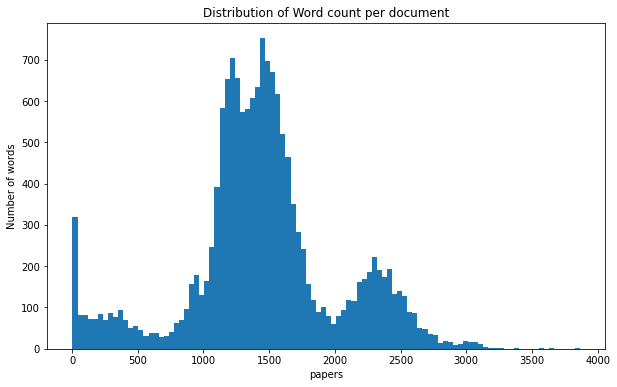

time: 543 ms


In [39]:
plt.figure(figsize=(10,6))
plt.hist(words_in_doc, bins = 100)
plt.title('Distribution of Word count per document')
plt.ylabel('Number of words')
plt.xlabel('papers')

In [54]:
pdt = pd.DataFrame(dt3c, columns=['file_path', 'content', 'wc'])

time: 2.48 ms


In [55]:
papers_has_10_words = pdt[pdt['wc']<10]

time: 2.41 ms


In [56]:
papers_has_10_words.head(10)

,file_path,content,wc
3,/Users/farukcankaya/Google Drive/AllPapers/8_AH/62_AH.pdf,nan nan nan,3
13,/Users/farukcankaya/Google Drive/AllPapers/8_AH/13_AH.pdf,nan nan nan,3
41,/Users/farukcankaya/Google Drive/AllPapers/8_AH/54_AH.pdf,nan nan nan,3
109,/Users/farukcankaya/Google Drive/AllPapers/8_AH/93_AH.pdf,nan nan nan,3
118,/Users/farukcankaya/Google Drive/AllPapers/8_AH/81_AH.pdf,nan nan nan,3
162,/Users/farukcankaya/Google Drive/AllPapers/8_AH/142_AH.pdf,743\n\n\n\nhttp://dx.doi.org/10.2308/acch-10432.s01 nan nan,3
223,/Users/farukcankaya/Google Drive/AllPapers/8_AH/85_AH.pdf,nan nan nan,3
240,/Users/farukcankaya/Google Drive/AllPapers/8_AH/97_AH.pdf,nan nan nan,3
242,/Users/farukcankaya/Google Drive/AllPapers/8_AH/101_AH.pdf,nan nan nan,3
274,/Users/farukcankaya/Google Drive/AllPapers/8_AH/146_AH.pdf,751\n\n\n\nhttp://dx.doi.org/10.2308/acch-10451.s01\n\nhttp://dx.doi.org/10.2308/acch-10451.s02 nan nan,3


time: 7.2 ms
